# Writing Numerical Programs
## Lecture 3

The CSM textbook encourages the use of *object-oriented programming* which is natural for some languages like Java or C++.

Although Python supports classes and objects, in Phys 2820 we will adopt a procedural style of programming. Python is an multi-paradigm programming language and supports a number of different programming approaches.

Our falling ball application can be divided into two main components:
- solving the numerical model
- displaying the results

We can use better program structure by splitting up the work our main function into these two sub-tasks.

### Model solving code

In [1]:
def FallingBallModel(dt=0.01, y0=100, v0=0, g=9.8, tmax=5):
    """
    Compute the trajectory of a falling ball
    
    Arguments: 
       dt time step
       y0 initial position
       v0 initial velocity
       g gravitational field
       tmax stop model if t exceeds tmax
    
    Returns: 
       dictionary of the numerical model
    """
    
    t = 0     # time
    y = y0
    v = v0
    
    while (y>0):
        y = y + v*dt
        v = v - g*dt # use Euler algorithm
        t = t + dt
        
        # if t exceeds tmax, stop iterating the loop
        if t > tmax:
            break
        
    model = {'t': t, 'y': y, 'v': v,
             'v0': v0, 'y0': y0, 'dt': dt, 
             'g': g, 'tmax': tmax,
            }
    
    return model

This function solves the numerical model and takes in a a number of optional keyword arguments and returns a *dictionary* with all of the relevant model parameters and data.

If no function arguements are specifie, the default values are used:

In [2]:
FallingBallModel()

{'t': 4.529999999999948,
 'y': -0.3304399999998038,
 'v': -44.39399999999976,
 'v0': 0,
 'y0': 100,
 'dt': 0.01,
 'g': 9.8,
 'tmax': 5}

But we also can specify a value by using keyword arguments:

In [3]:
FallingBallModel(dt=0.0001, v0=20.0)

{'t': 5.000000000001686,
 'y': 77.50245000002768,
 'v': -28.99999999997844,
 'v0': 20.0,
 'y0': 100,
 'dt': 0.0001,
 'g': 9.8,
 'tmax': 5}

### Printing out the results

Formatting the output and comparing with the analytical solution is a different task and can be put into a different function.

In [4]:
def FallingBallResults(model):
    """
    Arguments:
        model output from FallingBallModel()
        
    Display results of falling ball simulation.
    Compare with analytic result.
    """
   
    t = model['t']
    y = model['y']
    v = model['v']
    
    print("Results")
    print("final time = {:.4f}".format(t))
    print("numerical y = {:.4f} v = {:.4f}".format(y, v))
    
    y0 = model['y0']
    v0 = model['v0']
    g = model['g']
    
    # display analytical result
    yAnalytic = y0 + v0*t - 0.5*g*t*t
    vAnalytic = v0 - g*t
    
    print("analytic  y = {:.4f} v = {:.4f}".format(yAnalytic, vAnalytic))
 

We can pass the output from `FallingBallModel` as input to `FallingBallResults`:

In [5]:
ball = FallingBallModel(dt=0.0001)
FallingBallResults(ball)

Results
final time = 4.5176
numerical y = -0.0005 v = -44.2725
analytic  y = -0.0027 v = -44.2725


Notice that the variable name used *outside* a function does not need to the same as the name *inside* a function. Even `FallingBallModel` and `FallingBallResults` could use different variables names for `model` inside their function bodies if we wanted.

This kind of program structure allows us to put together more complicated models and applications.

In [6]:
def FallingBallExampleApp():
    """
    Compute the time of a falling ball comparing two
    different gravitational fields
    """
    
    dt = 0.0001
    
    g1 = 9.8
    ball1 = FallingBallModel(dt=dt, g=g1)
    print('g = {:.1f}'.format(g1))
    FallingBallResults(ball1)
    print('-'*34)
    
    g2 = 2.0
    ball2 = FallingBallModel(dt=dt, g=g2)
    print('g = {:.1f}'.format(g2))
    FallingBallResults(ball2)
    
FallingBallExampleApp()

g = 9.8
Results
final time = 4.5176
numerical y = -0.0005 v = -44.2725
analytic  y = -0.0027 v = -44.2725
----------------------------------
g = 2.0
Results
final time = 5.0000
numerical y = 75.0005 v = -10.0000
analytic  y = 75.0000 v = -10.0000


### Graphically displaying the results

Display results by printing them out is only one way of looking at a model.  Alternatively, we may want to create a plot for the model.

In [7]:
def FallingBallResultsPlot(model):
    """
        Arguments:
        model output from FallingBallModel()
        
    Plots falling ball simulation as function of time t.
    Compare with analytic result.
    """
    
    t = model['t']
    y = model['y']
    v = model['v']
    dt = model['dt']
    
    plt.plot(t, y, 'bo', markersize=14, label='numerical')
    
    y0 = model['y0']
    v0 = model['v0']
    g = model['g']
    
    # compute analytical result
    yAnalytic = y0 + v0*t - 0.5*g*t*t
    vAnalytic = v0 - g*t
    
    plt.plot(t, yAnalytic, 'r.', markersize=10, label='analytical')
    
    plt.xlabel('time t (s)')
    plt.ylabel('y (m)')
    plt.legend()

Since we are using plotting, we need to remember to first import *Matplotlib*

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

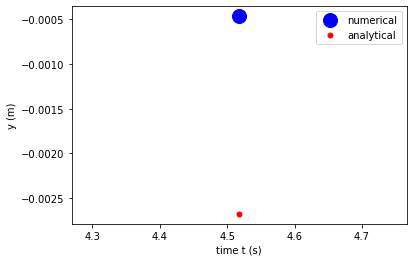

In [9]:
FallingBallResultsPlot(ball)

We will very soon getting plotting position as a function of time. For now, notice that code in  `FallingBallPlot` makes a graphical representation of the same textual output produced by `FallingBallResults`.

- - -
#### Matplotlib

Plots are made with the `plt.plot()` command and need to have, at minimum, what variable should be on the horizontal axis followed by what variable should be on the vertical axis.

There are many ways to annotate your plots to change how they look.  In this case we made the numerical result a big blue circle and the analytical result a small red dot. 

Axis labels were set using the commands `plt.xlabel()` and `plt.ylabel()`.  Please try to ensure every plot you make has (at least) axis labels.

Since each `plt.plot()` function call has an (optional) label keyword, the function `plt.legend()` can be used to draw a legend on our plot.

Matplotlib has many different options for making plots and usualy you learn how more about this plotting library by trying to make different kind of plots.  Some resources:

1. SciPy Lecture on Matplotlib: http://scipy-lectures.org/intro/matplotlib/
2. Matplotlib Example Gallery: https://matplotlib.org/gallery/index.html
3. Matplotlib User's Guide: https://matplotlib.org/users/index.html
- - -

Alternatively, we may wish to produce a plot that shows the dependence of the final position on time step.

In [10]:
def FallingBallTimeStepPlot(model):
    """
    Arguments:
        model output from FallingBallModel()
        
    Plots falling ball simulation as function of time step dt.
    Compare with the analytic result.
    """
   
    t = model['t']
    y = model['y']
    v = model['v']
    dt = model['dt']
    
    plt.semilogx(dt, y, 'bo', markersize=14)
    
    y0 = model['y0']
    v0 = model['v0']
    g = model['g']
    
    # compute analytical result
    yAnalytic = y0 + v0*t - 0.5*g*t*t
    vAnalytic = v0 - g*t
    
    plt.semilogx(dt, yAnalytic, 'r.', markersize=10)
    
    plt.xlabel('time step (s)')
    plt.ylabel('y (m)')

In this plotting routine we are using the function `plt.semilogx()` to put a logarithmic scale on the horizontal axis.

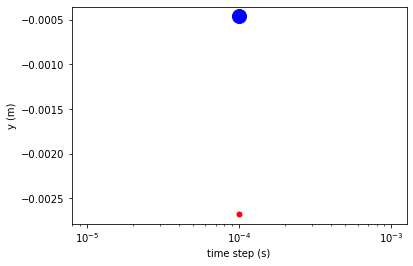

In [11]:
FallingBallTimeStepPlot(ball)

We can use this function to write a program to examine how the time step affects the final position.

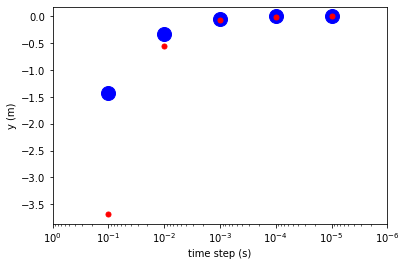

In [12]:
def FallingBallTimeStepApp():
    """
    Compute the final position of a falling ball
    for different time steps.
    """
    
    for dt in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
        ball = FallingBallModel(dt=dt)
        FallingBallTimeStepPlot(ball)
        
    # reverse the x-axis so time step is decreasing left to right
    plt.xlim(1e0, 1e-6)
    
FallingBallTimeStepApp()

This is a variation on using a `for` loop.  The variable `dt` takes on each value in the list. In Python, a `list` is a commonly used container for ordering many variables. A list is created when you use the symbols `[` and `]`. 

For interactive plots, we can also use widgets. Widgets are user interface elements (sliders, buttons, menus, check boxes) that are used to change what is shown in the plot.

In [13]:
from ipywidgets import interactive

In [14]:
def FallingBallInteractiveApp(tmax=4):
    """
    Compute and plot position of a falling ball
    up to a maximum time of tmax
    """
    
    dt = 0.01
    ball = FallingBallModel(dt=dt, tmax=tmax)
    FallingBallResultsPlot(ball)
    plt.ylim(0, ball['y0'])
    plt.xlim(0, 5)

interactive(FallingBallInteractiveApp, tmax=(0,5,0.1), )

interactive(children=(FloatSlider(value=4.0, description='tmax', max=5.0), Output()), _dom_classes=('widget-in…

See the [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/index.html) documentation for more advanced uses.

### Bouncing ball

We can make our model as general as we want. Suppose we wanted to add the requirement that if the vertical position we to go below 0, we assume the ball bounces inelastically with some loss of kinetic energy.

In [15]:
def BouncingBallModel(dt=0.01, y0=100, v0=0, g=9.8, 
                      tmax=5, loss=0.50):
    """
    Compute the trajectory of a bouncing ball.
    
    Ball bounces until t > tmax 
    
    Arguments: 
       dt time step
       y0 initial position
       v0 initial velocity
       g gravitational field
       tmax stop model if t exceeds tmax
       loss fraction of energy to lose on each bounce
    
    Returns: 
       dictionary of the numerical model
    """
    
    t = 0     # time
    y = y0
    v = v0
    
    while True:
        # this loop will go until a break condition is reached
            
        y = y + v*dt
        v = v - g*dt # use Euler algorithm
        t = t + dt
        
        # model the bounce
        if y < 0:
            # assume energy is reduced by a fractional loss
            m = 1 # assume ball mass is 1
            E = 0.5 * m * v**2 # kinetic energy
            Enew = E*(1-loss)
            v = np.sqrt(2*Enew / m)
            
            y = -y
        
        # if t exceeds tmax, stop iterating the loop
        if t > tmax:
            break
        
    model = {'t': t, 'y': y, 'v': v,
             'v0': v0, 'y0': y0, 'dt': dt, 
             'g': g, 'tmax': tmax,
            }
    
    return model

Here, we modelled the bounce by computing the kinetic energy of the ball and assumes that 50% of the energy is lost to on each bounce. Notice that we are using the `np.sqrt()` function from NumPy so we needed to import that library,

In [16]:
import numpy as np

Usually, these `import` statements happen near the top of a notebook. Starting with the next lecture we will always beging by importing commonly used packages like `numpy` and `matplotlib.pyplot`.

In [17]:
BouncingBallModel()

{'t': 5.009999999999938,
 'y': 14.292823253117618,
 'v': 26.68729844399547,
 'v0': 0,
 'y0': 100,
 'dt': 0.01,
 'g': 9.8,
 'tmax': 5}

Putting this model into an application allows us to explore our bouncing ball.

In [18]:
def BouncingBallInteractiveApp(t=4):
    """
    Compute and plot position of a bouncing ball
    up to a maximum time of t
    """
    
    ball = BouncingBallModel(tmax=t)    
    FallingBallResultsPlot(ball)

    plt.ylim(0, ball['y0'])
    plt.xlim(0, 20)
    
interactive(BouncingBallInteractiveApp, t=(0,20,0.1), )

interactive(children=(FloatSlider(value=4.0, description='t', max=20.0), Output()), _dom_classes=('widget-inte…

*Question* Why does the red dot representing the analytical solution  dissappear for $ t> 4.5$ ?

There is a problem with this approach to examine the behaviour over time. To plot any specific time, we have to recompute all of the values up to that value. 

As an alternative, we can rewrite our model to that it generates an *iterator* that will be *iterable*.  

In [19]:
def BouncingBallStepper(dt=0.01, y0=100, v0=0, g=9.8, 
                      tmax=5, loss=0.50):
    """
    Compute the trajectory of a bouncing ball.
    
    Ball bounces until t > tmax 
    
    Arguments: 
       dt time step
       y0 initial position
       v0 initial velocity
       g gravitational field
       tmax stop model if t exceeds tmax
       loss fraction of energy to lose each bounce
    
    Returns: 
       dictionary of the numerical model
    """
    
    t = 0     # time
    y = y0
    v = v0
    
    while True:
         # this loop will go forever until a break condition is reached
        
        model = {'t': t, 'y': y, 'v': v,
                 'v0': v0, 'y0': y0, 'dt': dt, 
                 'g': g, 'tmax': tmax,
                 'loss': loss,
                 }
        yield model # return to the caller
            
        # use Euler algorithm
        y = y + v*dt
        v = v - g*dt
        t = t + dt
        
        # model the bounce
        if y < 0:
            # assume energy is reduced by a fractional loss
            m = 1 # assume ball mass is 1
            E = 0.5 * m *v**2 # kinetic energy
            Enew = E*(1-loss)
            v =  np.sqrt(2*Enew / m)
            y = -y
    
        # if t exceeds tmax, stop iterating the loop
        if t > tmax:
            break

The concepts of *iterators* and *iterables* are everywhere in Python but their technical details are unimportant. 

In the model code above, we removed the `return` statement at the end and added a `yield` statement at the beginning of the loop. 

In [20]:
model = BouncingBallStepper(tmax=1, dt=0.1)

This variable `model` is now a *generator* which will return succesive time steps of our model. This is why this function is called a *Stepper* because it will be used to step forward the model in time.

In [21]:
type(model)

generator

To get the result of for the first time step, we use the statment `next`

In [22]:
next(model)

{'t': 0,
 'y': 100,
 'v': 0,
 'v0': 0,
 'y0': 100,
 'dt': 0.1,
 'g': 9.8,
 'tmax': 1,
 'loss': 0.5}

This is the result from the first `yield` statement. `yield` is acting very similarily to the `return` statement; it is passing back some data to the caller of the function.

But with a generator, we can call `next` again to get the results of the next time step.

In [23]:
next(model)

{'t': 0.1,
 'y': 100.0,
 'v': -0.9800000000000001,
 'v0': 0,
 'y0': 100,
 'dt': 0.1,
 'g': 9.8,
 'tmax': 1,
 'loss': 0.5}

This allows us to loop through the model output for all times:

In [24]:
for x in model:
    print(x)

{'t': 0.2, 'y': 99.902, 'v': -1.9600000000000002, 'v0': 0, 'y0': 100, 'dt': 0.1, 'g': 9.8, 'tmax': 1, 'loss': 0.5}
{'t': 0.30000000000000004, 'y': 99.706, 'v': -2.9400000000000004, 'v0': 0, 'y0': 100, 'dt': 0.1, 'g': 9.8, 'tmax': 1, 'loss': 0.5}
{'t': 0.4, 'y': 99.412, 'v': -3.9200000000000004, 'v0': 0, 'y0': 100, 'dt': 0.1, 'g': 9.8, 'tmax': 1, 'loss': 0.5}
{'t': 0.5, 'y': 99.02000000000001, 'v': -4.9, 'v0': 0, 'y0': 100, 'dt': 0.1, 'g': 9.8, 'tmax': 1, 'loss': 0.5}
{'t': 0.6, 'y': 98.53000000000002, 'v': -5.880000000000001, 'v0': 0, 'y0': 100, 'dt': 0.1, 'g': 9.8, 'tmax': 1, 'loss': 0.5}
{'t': 0.7, 'y': 97.94200000000002, 'v': -6.860000000000001, 'v0': 0, 'y0': 100, 'dt': 0.1, 'g': 9.8, 'tmax': 1, 'loss': 0.5}
{'t': 0.7999999999999999, 'y': 97.25600000000001, 'v': -7.840000000000002, 'v0': 0, 'y0': 100, 'dt': 0.1, 'g': 9.8, 'tmax': 1, 'loss': 0.5}
{'t': 0.8999999999999999, 'y': 96.47200000000001, 'v': -8.820000000000002, 'v0': 0, 'y0': 100, 'dt': 0.1, 'g': 9.8, 'tmax': 1, 'loss': 0.5

Notice that if you try and run the above code again, nothing will happen.  

In [25]:
for x in model:
    print(x)

This is because the simluation has reached its end state.  A new simulation needs to be created to run the model again.


In the DataCamp exercises you may have encountered the Pandas (Python data analysis) library in Python. This library is very useful for considering time series; the kind of output we get from our stepper code.

In [26]:
import pandas as pd

Pandas has a new data type called a *DataFrame*

In [27]:
model = BouncingBallStepper(tmax=20)
ball = pd.DataFrame(model)

We can display just the first few rows of a DataFrame with the method `.head()`

In [28]:
ball.head()

,t,y,v,v0,y0,dt,g,tmax,loss
0,0.00,100.00000,0.000,0,100,0.01,9.8,20,0.5
1,0.01,100.00000,-0.098,0,100,0.01,9.8,20,0.5
2,0.02,99.99902,-0.196,0,100,0.01,9.8,20,0.5
3,0.03,99.99706,-0.294,0,100,0.01,9.8,20,0.5
4,0.04,99.99412,-0.392,0,100,0.01,9.8,20,0.5


Now we can make as many plots as we like. We could plot the vertical position `y` against the time `t`:

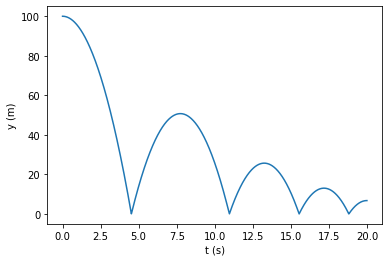

In [29]:
plt.plot(ball.t, ball.y)
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.show()

Or plot the velocity `v` against the vertical position `y`:

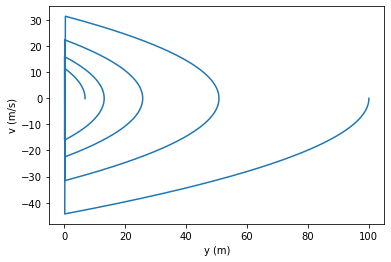

In [30]:
plt.plot(ball.y, ball.v)
plt.xlabel('y (m)')
plt.ylabel('v (m/s)')
plt.show()

Now that we have the entire time series associated with a model, we make a plotting routine to show the whole path.

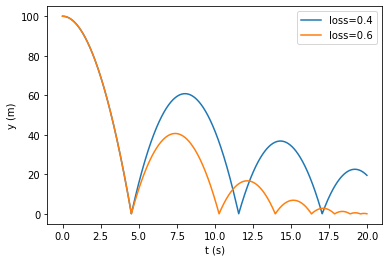

In [31]:
def BouncingBallPlot(ball, label=None):
    """
    Plot the position vs time from model data for a ball

    Arguments:
      ball DataFrame with ball data
      label (optional) legend label
    """
    plt.plot(ball.t, ball.y, label=label)
    plt.ylabel('y (m)')
    plt.xlabel('t (s)')
    
def BouncingBallsApp():
    """
    Compare bouncing balls with two different energy loss rates
    """
    
    model1 = BouncingBallStepper(tmax=20, loss=0.40)
    ball1 = pd.DataFrame(model1)
    BouncingBallPlot(ball1, label='loss=0.4')

    model2 = BouncingBallStepper(tmax=20, loss=0.60)
    ball2 = pd.DataFrame(model2)
    BouncingBallPlot(ball2, label='loss=0.6')
    
    plt.legend()

BouncingBallsApp()

- - -
### **Exercise** Model a falling ball

a. Write a new program called `FallingBallApp` that models and then plots the vertical position verus time for a falling ball under gravity that stops when it hits the ground.  You will need to create a new function `FallingBallStepper` that yields the output at every time step. Your program should call a new function `FallingBallPlot` that plots both the numerical results **and** the analytical solution for all time steps. Be sure to include a legend and label your axes. Run your program in a Jupyter notebook to show your plot.

b. Modify your `FallingBallApp` program so that it take a single argument `dt` to set the time step.  Make your program interactive (`from ipywidgets import interactive`) to explore how the numerical solution differs from the analytical solution. How much smaller does $\Delta t$ have to be to reduce the error in the numerical results by a factor of two for the same final time? What about a factor of four? How does the error depend on $\Delta t$?

- - - 
## Textbook readings

Read the following sections from [CSM Chapter 2](https://www.compadre.org/osp/document/ServeFile.cfm?ID=7375&DocID=2145&Attachment=1)
- None (Although this lecture was motivated by the content of 2.3 through 2.7, the text focuses too much on object-oriented programming and can skipped.)

## DataCamp exercises

To learn more about Python, continue to work through the following [DataCamp](http://datacamp.com) chapters over the next week:
- Introduction to Python: Python Basics
- Introduction to Python: Functions and Packages 
- Introduction to Python: NumPy 
- Intermediate Python for Data Science: Matplotlib 
- Intermediate Python for Data Science: Logic, Control Flow and Filtering 
- Intermediate Python for Data Science: Loops
